In [14]:
!pip install pandas tabulate

import matplotlib.pyplot as plt
import os
import json
import matplotlib.patches as patches
from tabulate import tabulate





In [3]:
# read all results.json files which are stored at ./{some_name}/results.json
# and plot the results

def read_results():
    results = []
    for root, dirs, files in os.walk('.'):
        for file in files:
            if file == 'results.json':
                with open(os.path.join(root, file), 'r') as f:
                    obj_dict = json.load(f)
                    obj_dict["fname"] = root
                    results.append(obj_dict)
    return results


In [4]:
print(read_results())

[{'name': 'fasterrcnn_resnet50_fpn', 'pretrained': True, 'freeze_layers': False, 'batch_size': 4, 'dataset': 'kitti_reduced_0', 'dataset_config': {'class_list': ['Background', 'Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc', 'DontCare'], 'num_classes': 10}, 'val_iou': 0.21436335146427155, 'val_precision': 0.9272402013811671, 'val_recall': 0.9028998393018824, 'val_f1': 0.9147551934597634, 'val_map': 0.8253285299204705, 'test_iou': 0.22484898567199707, 'test_precision': 0.942324879280003, 'test_recall': 0.9056595847772438, 'test_f1': 0.9229314551067778, 'test_map': 0.853039074251984, 'Car_ap': 0.9708268104130604, 'Van_ap': 0.9319061615359394, 'Truck_ap': 0.9211581269787984, 'Pedestrian_ap': 0.8181998809963102, 'Person_sitting_ap': 0.416017215555605, 'Cyclist_ap': 0.8347617037468572, 'Tram_ap': 0.9304941609771704, 'Misc_ap': 0.7792641791600221, 'fname': './kitti_reduced_0_fasterrcnn_resnet50_fpn_5_pretrained'}, {'name': 'fasterrcnn_mobilenet_v3_large_fpn',

63 63


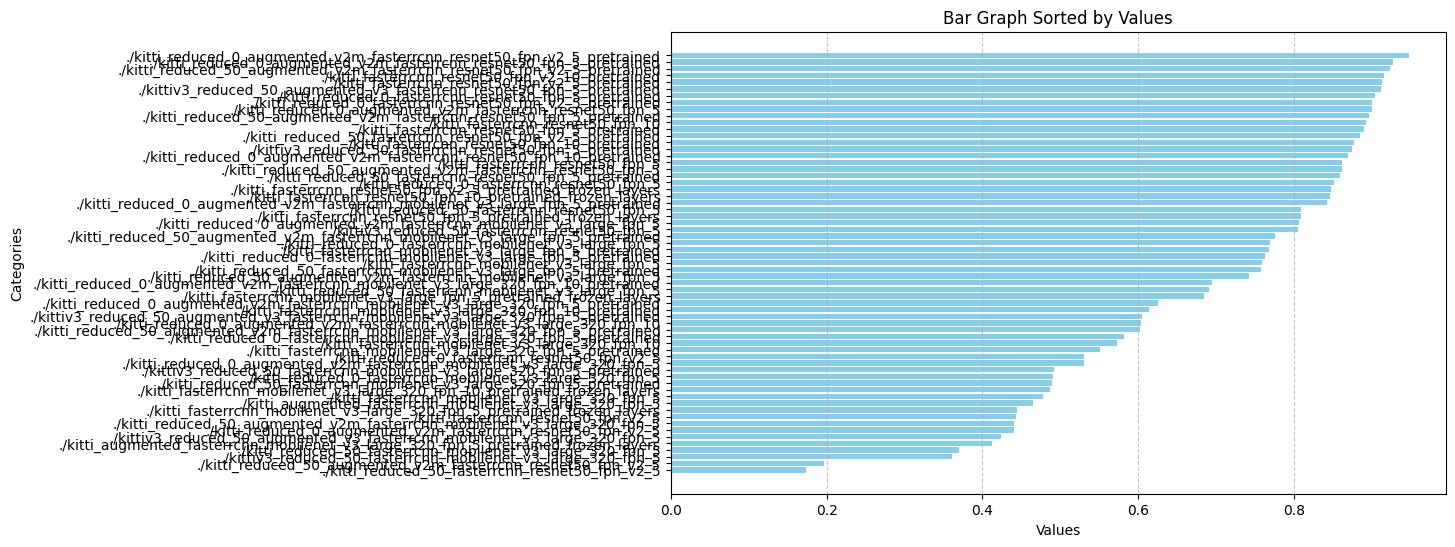

In [5]:
# plot all "test_precision" values
# x axis: name
# y axis: test_precision
# There are 15 total. Also format the plot nicely.

results = read_results()
names = []
test_precisions = []
for result in results:
    names.append(result['fname'])
    test_precisions.append(result['val_recall'])

# sort the names and test_precisions
names, test_precisions = zip(*sorted(zip(names, test_precisions), key=lambda x: x[1]))

print(len(names), len(test_precisions) )

plt.figure(figsize=(10, 6))
plt.barh(names, test_precisions, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Bar Graph Sorted by Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()



In [10]:
results = read_results()

# pair results that contain augmented with the ones that don't
# Find all results with "augmented" in the fname, then find their corresponding results without. The substrings of the fname will be the same after "fasterrcnn"

augmented = []
non_augmented = []
for result in results:
    if not "reduced_50" in result['fname'] or "./kittiv3_reduced_50_fasterrcnn_resnet50_fpn_5" == result['fname']:
        continue
    print(result['fname'])
    if "augmented" in result['fname']:
        augmented.append(result)
    else:
        non_augmented.append(result)

print(len(augmented), len(non_augmented))

# put the two results into tuples

pairs = []
for aug in augmented:
    for non_aug in non_augmented:
        index_frcnn_aug = aug['fname'].find('fasterrcnn')
        index_frcnn_non_aug = non_aug['fname'].find('fasterrcnn')
        if aug['fname'][index_frcnn_aug:] == non_aug['fname'][index_frcnn_non_aug:]:
            pairs.append((aug, non_aug))



./kitti_reduced_50_fasterrcnn_mobilenet_v3_large_fpn_5
./kitti_reduced_50_fasterrcnn_resnet50_fpn_5_pretrained
./kittiv3_reduced_50_fasterrcnn_mobilenet_v3_large_320_fpn_5
./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained
./kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5
./kitti_reduced_50_fasterrcnn_mobilenet_v3_large_320_fpn_5
./kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5
./kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained
./kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5
./kitti_reduced_50_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained
./kitti_reduced_50_fasterrcnn_resnet50_fpn_5
./kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained
./kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained
./kitti_reduced_50_fasterrcnn_resnet50_fpn_v2_5_pretrained
./kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained
./kitti_redu

In [11]:
files = ['./kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained']

"""
./kittiv3_reduced_50_fasterrcnn_mobilenet_v3_large_320_fpn_5
./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained
./kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained
./kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5
./kittiv3_reduced_50_fasterrcnn_resnet50_fpn_5_pretrained
./kittiv3_reduced_50_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained
"""


file_to_name = {
    './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5': "mobilenet v3 large",
    './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5': "resnet50 fpn v2",
    './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained': "resnet50 fpn pretrained",
    './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5': "mobilenet v3 large",
    './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained': "mobilenet v3 large pretrained",
    './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained': "resnet50 fpn v2 pretrained",
    './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5': "resnet50 fpn",
    './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained': "mobilenet v3 large 320 pretrained",
    './kittiv3_reduced_50_fasterrcnn_mobilenet_v3_large_320_fpn_5': "mobilenet v3 large 320",
    './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained': "resnet50 fpn pretrained",
    './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained': "mobilenet v3 large 320 pretrained",
    './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5': "mobilenet v3 large 320",
    './kittiv3_reduced_50_fasterrcnn_resnet50_fpn_5_pretrained': "resnet50 fpn pretrained",
    './kittiv3_reduced_50_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained': "mobilenet v3 large 320 pretrained"
    
    
}

"""
    "val_iou": 0.15061259269714355,
    "val_precision": 0.8777058185109722,
    "val_recall": 0.8472284689239467,
    "val_f1": 0.8617229889282549,
    "val_map": 0.7535181167185725,
    "test_iou": 0.1488405168056488,
    "test_precision": 0.8977682784428451,
    "test_recall": 0.8718351066783168,
    "test_f1": 0.8839659183253943,
    "test_map": 0.787337166822575,
    "Car_ap": 0.9618524469118936,
    "Van_ap": 0.9036627634481775,
    "Truck_ap": 0.8697219475156159,
    "Pedestrian_ap": 0.8104007468515242,
    "Person_sitting_ap": 0.35255985110292737,
    "Cyclist_ap": 0.8134884957482047,
    "Tram_ap": 0.6580914074873214,
    "Misc_ap": 0.6583672746829147
"""
key_to_label = {
    "val_iou": "Validation IoU",
    "val_precision": "Validation Precision",
    "val_recall": "Validation Recall",
    "val_f1": "Validation F1",
    "val_map": "Validation mAP",
    "test_iou": "Test IoU",
    "test_precision": "Test Precision",
    "test_recall": "Test Recall",
    "test_f1": "Test F1",
    "test_map": "Test mAP",
    "Car_ap": "Car AP",
    "Van_ap": "Van AP",
    "Truck_ap": "Truck AP",
    "Pedestrian_ap": "Pedestrian AP",
    "Person_sitting_ap": "Person sitting AP",
    "Cyclist_ap": "Cyclist AP",
    "Tram_ap": "Tram AP",
    "Misc_ap": "Misc AP",
}


['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

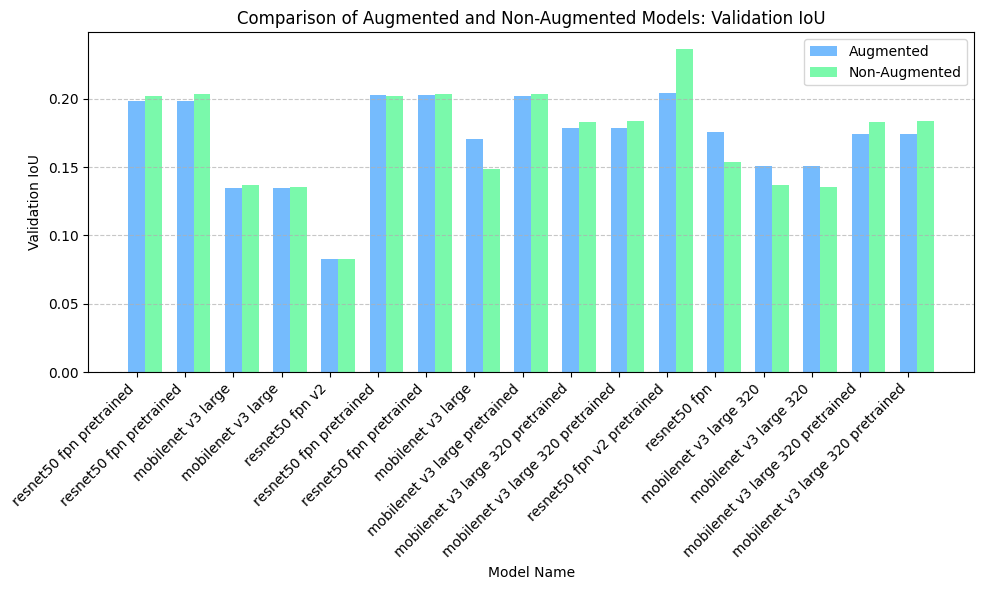

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

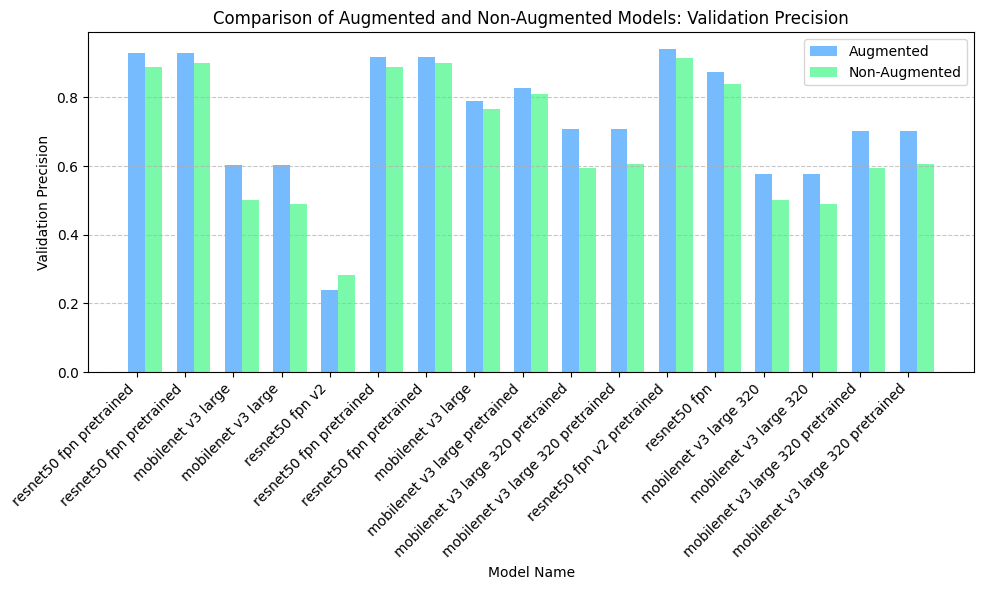

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

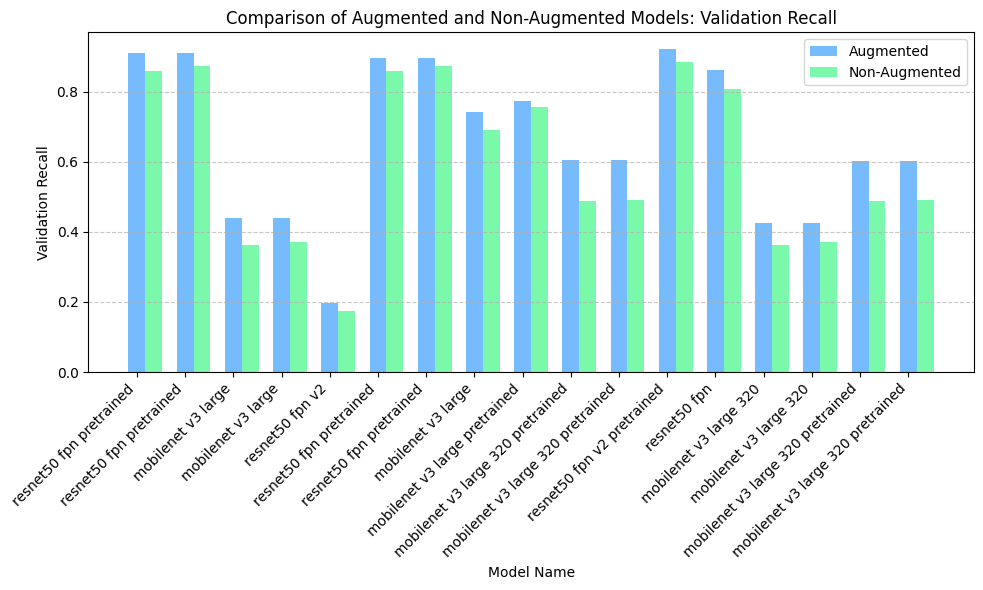

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

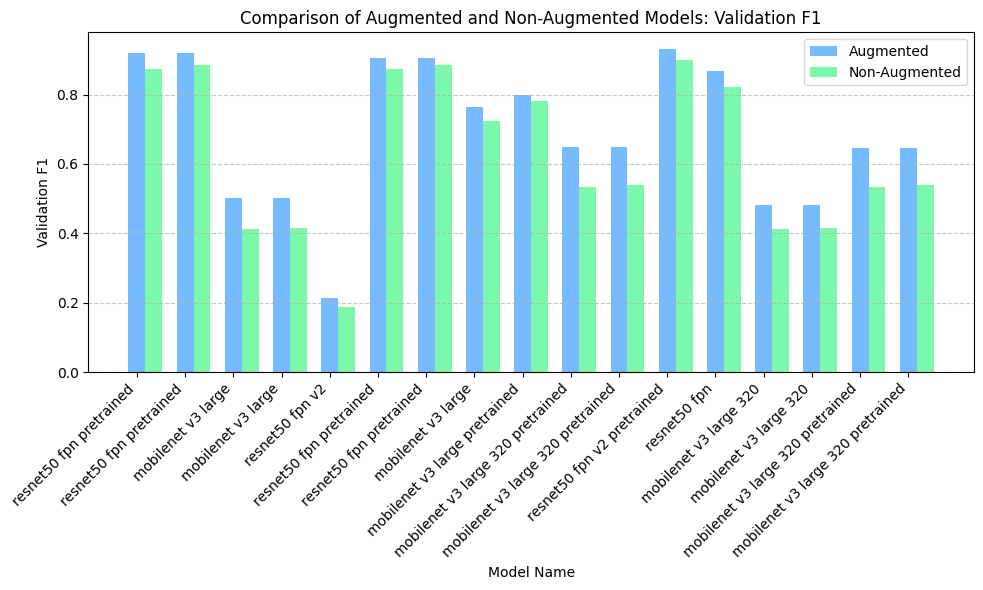

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

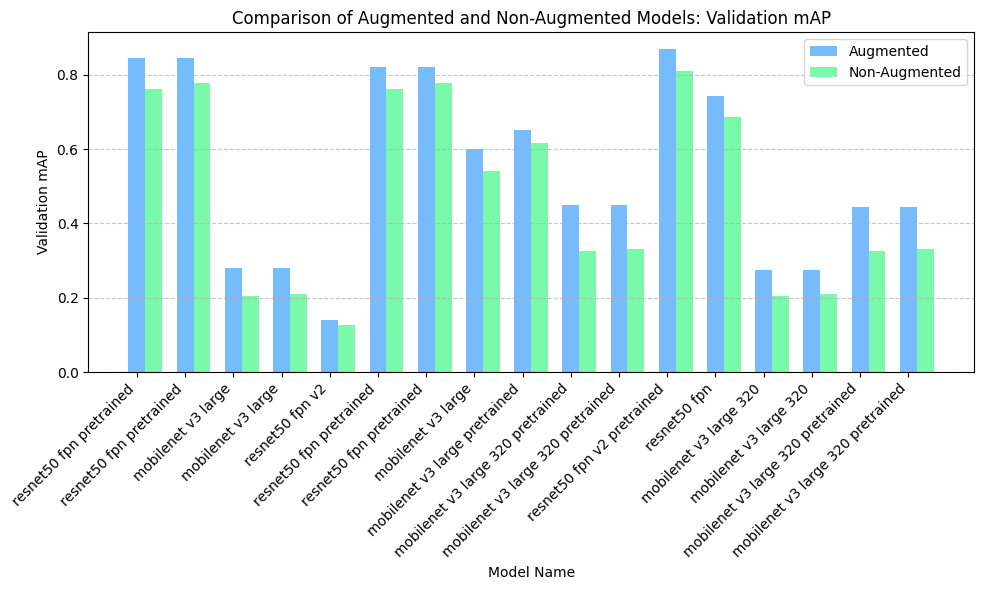

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

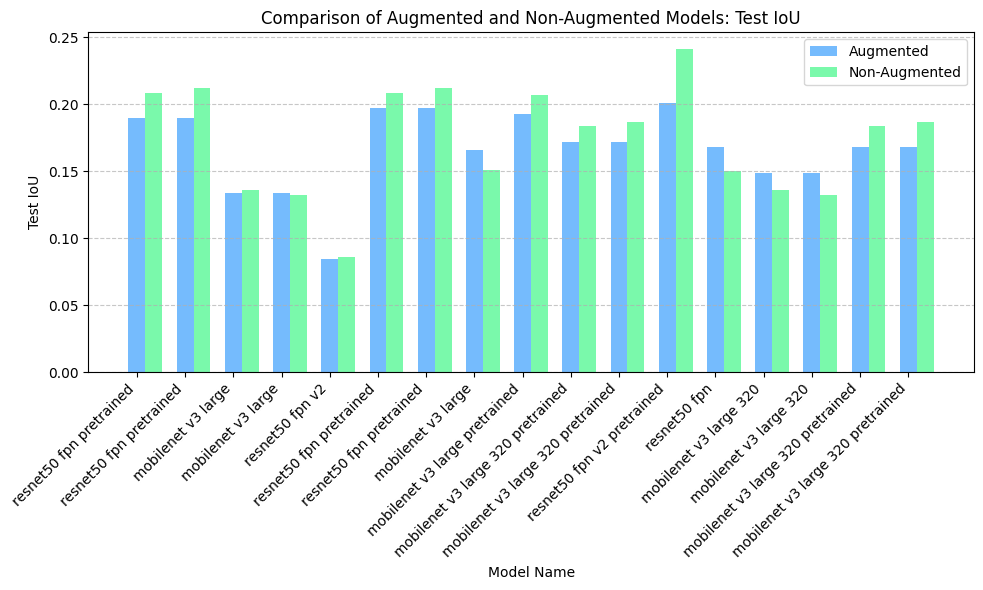

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

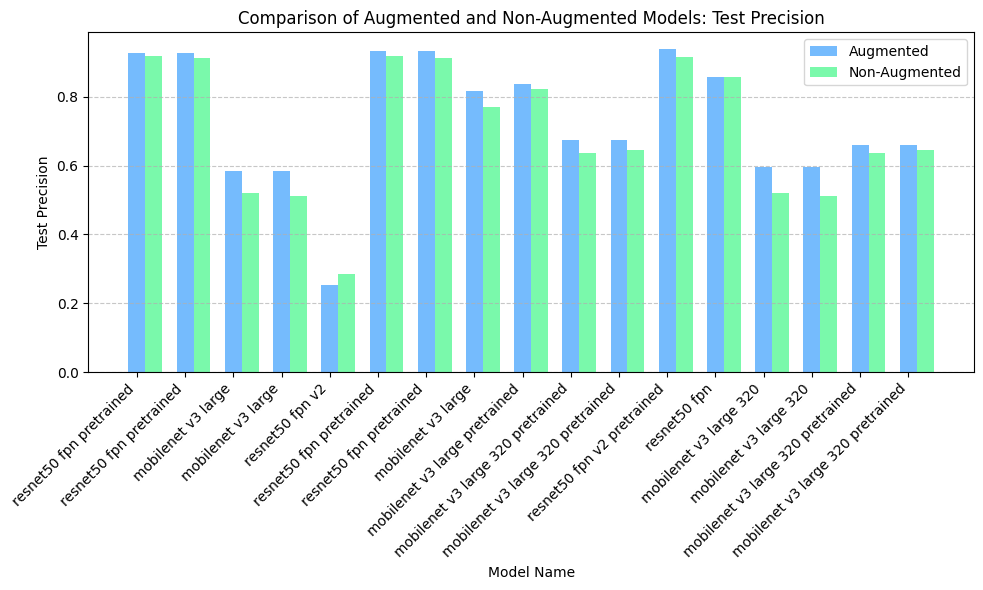

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

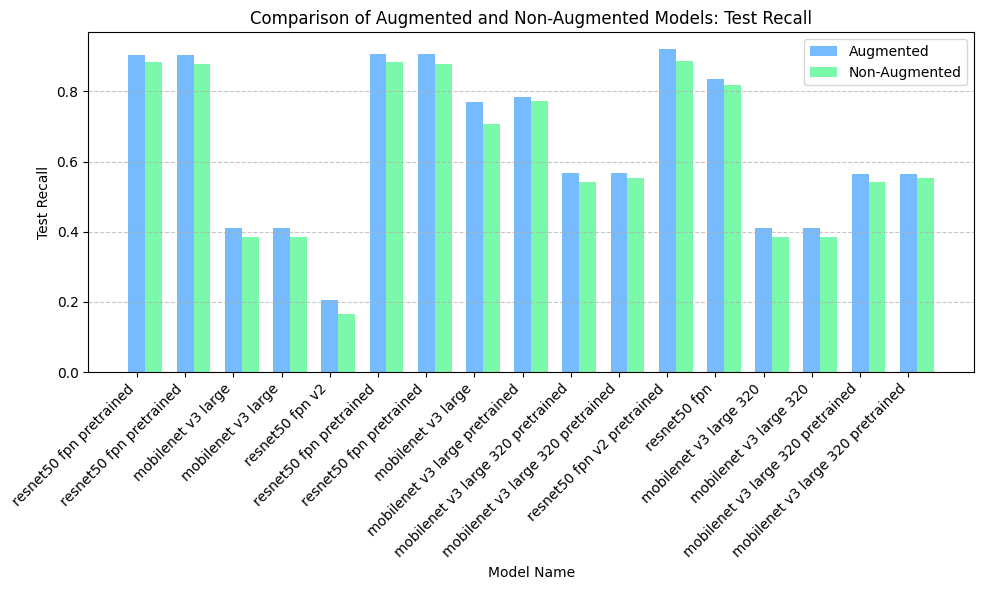

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

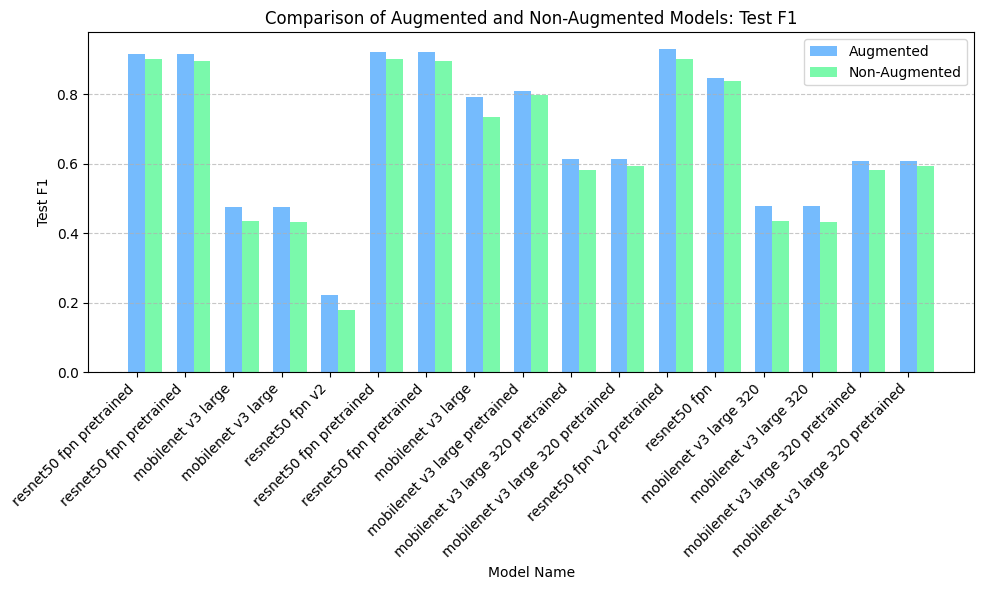

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

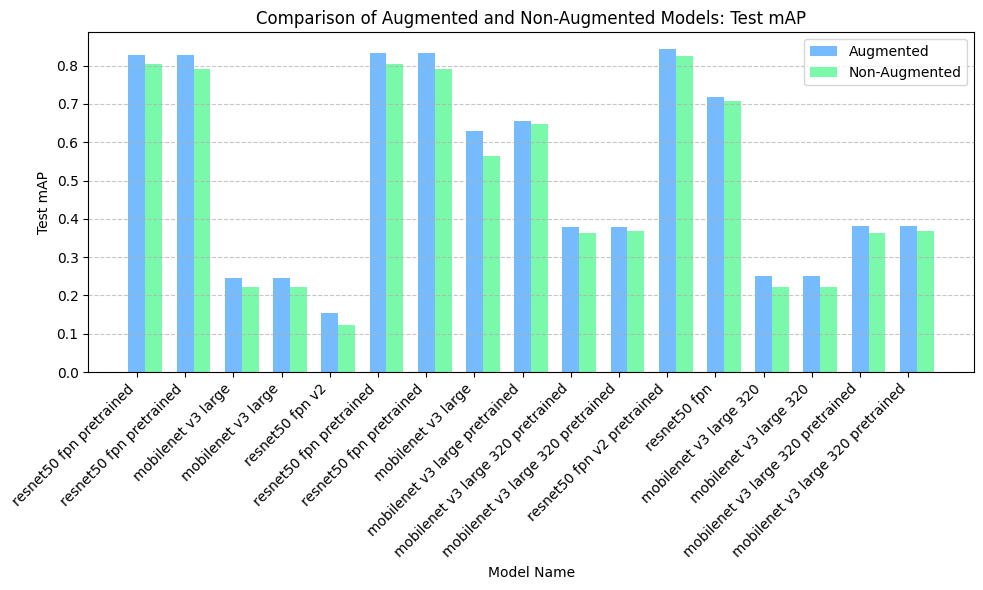

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

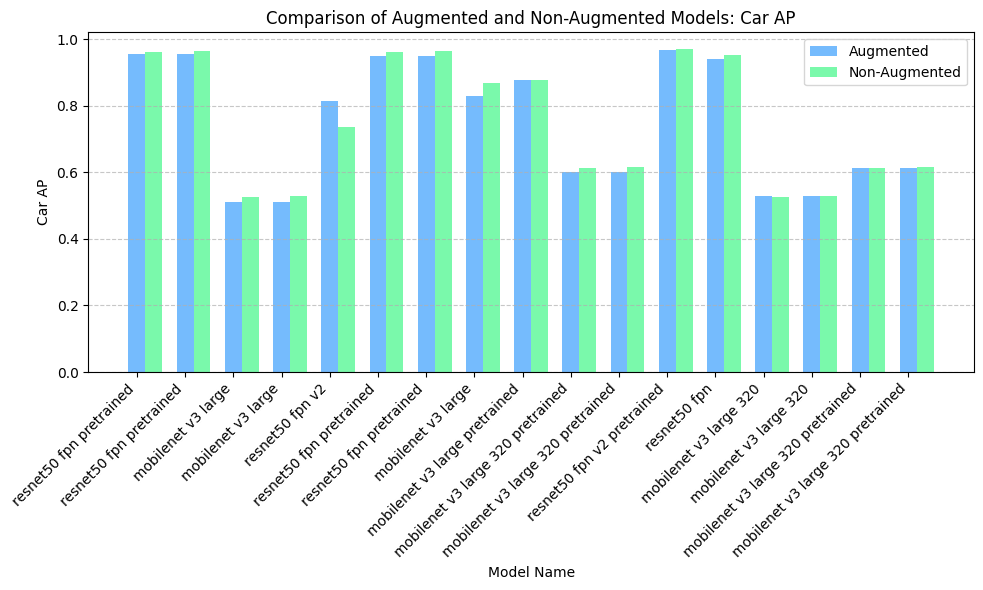

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

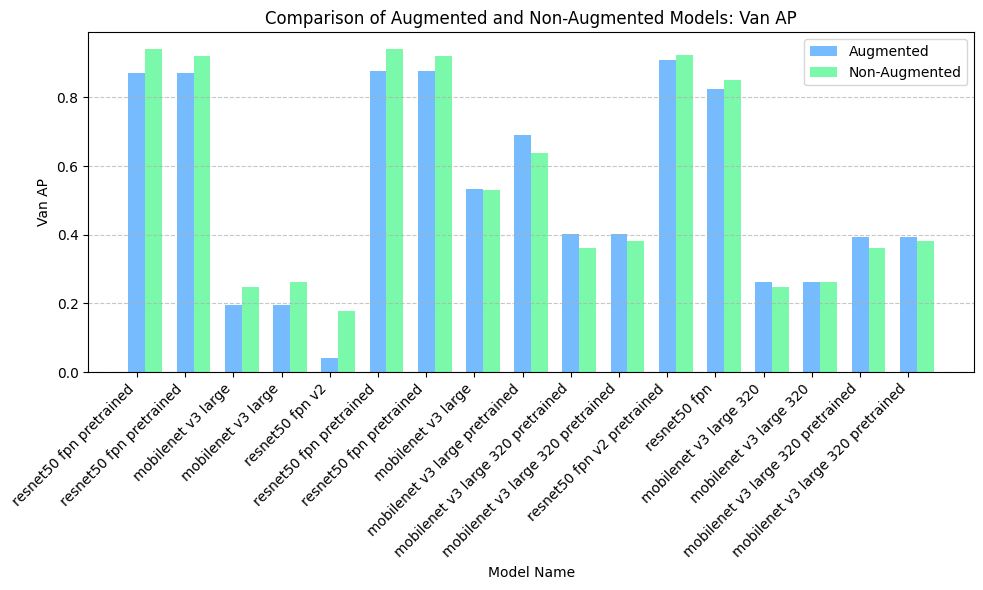

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

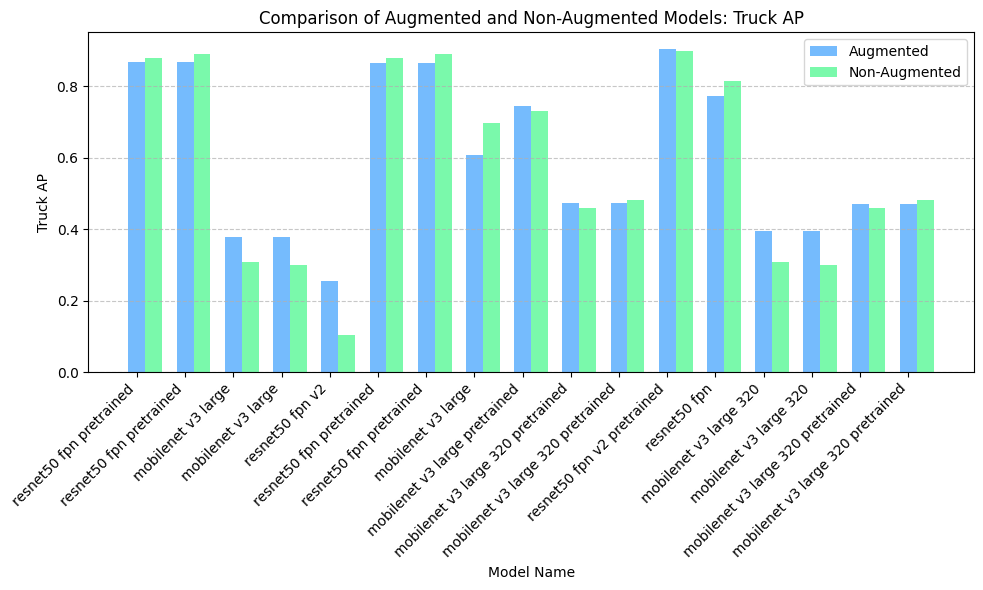

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

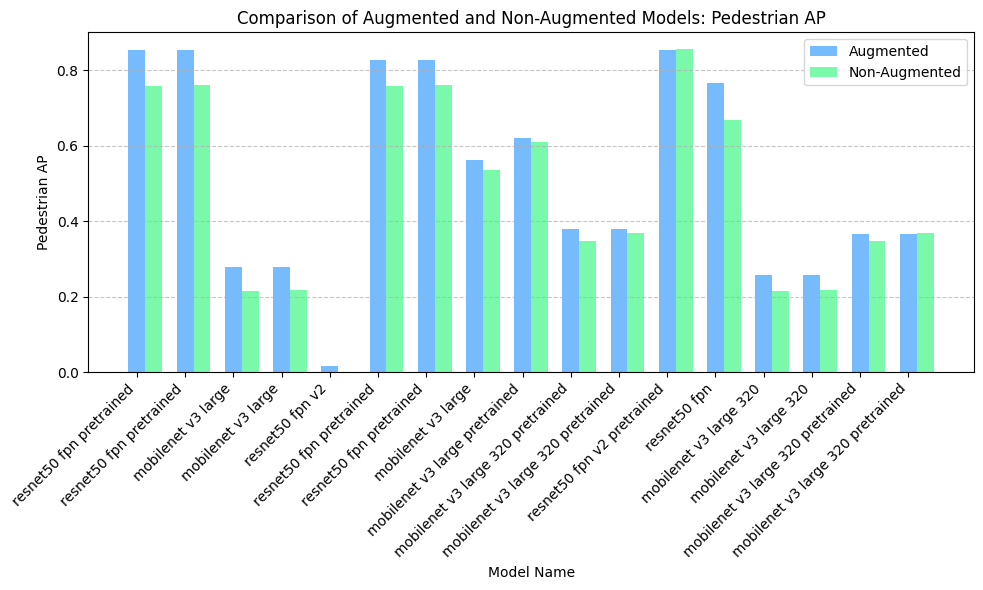

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

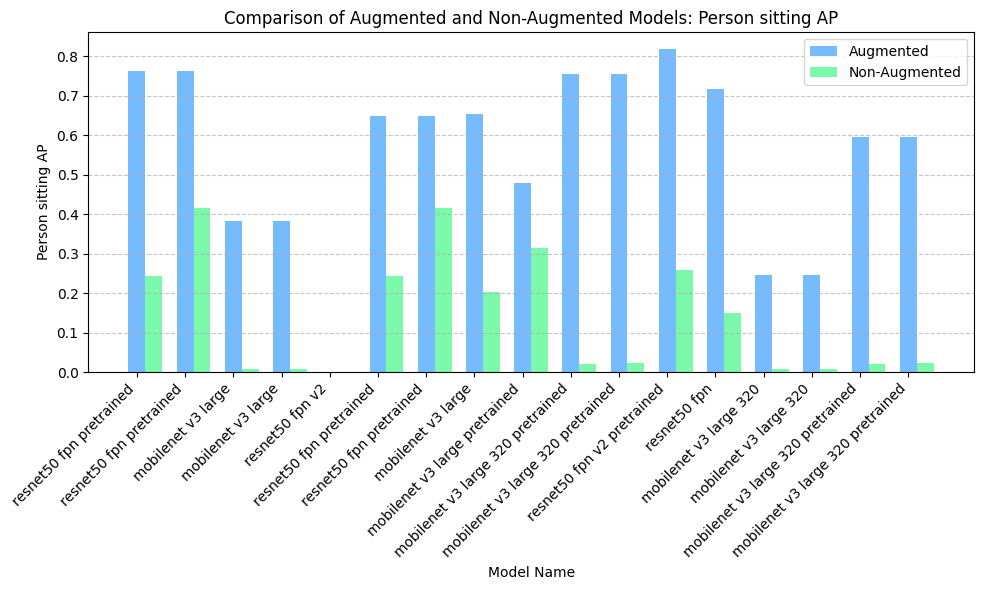

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

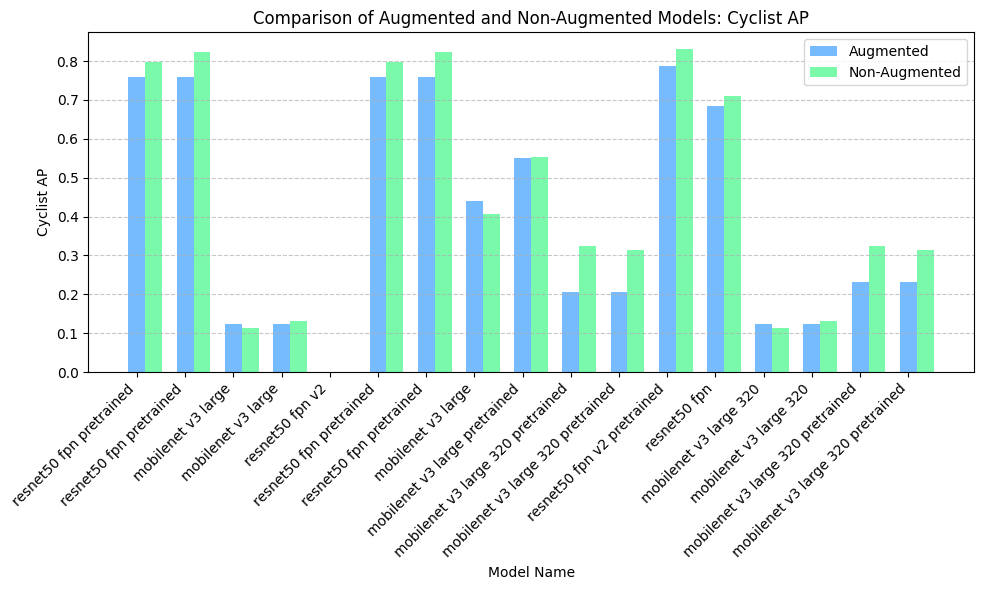

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

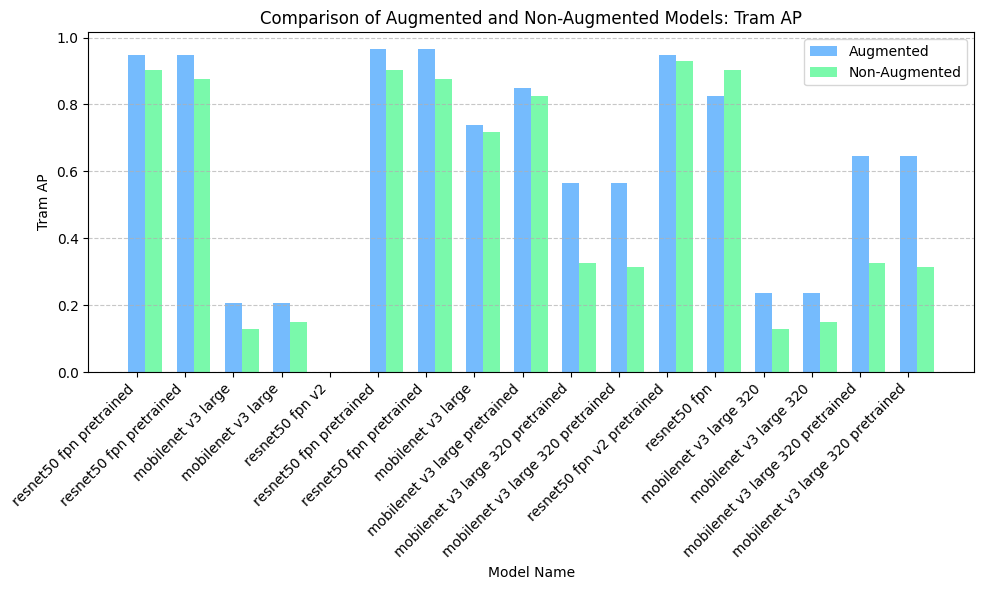

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kittiv3_reduced_

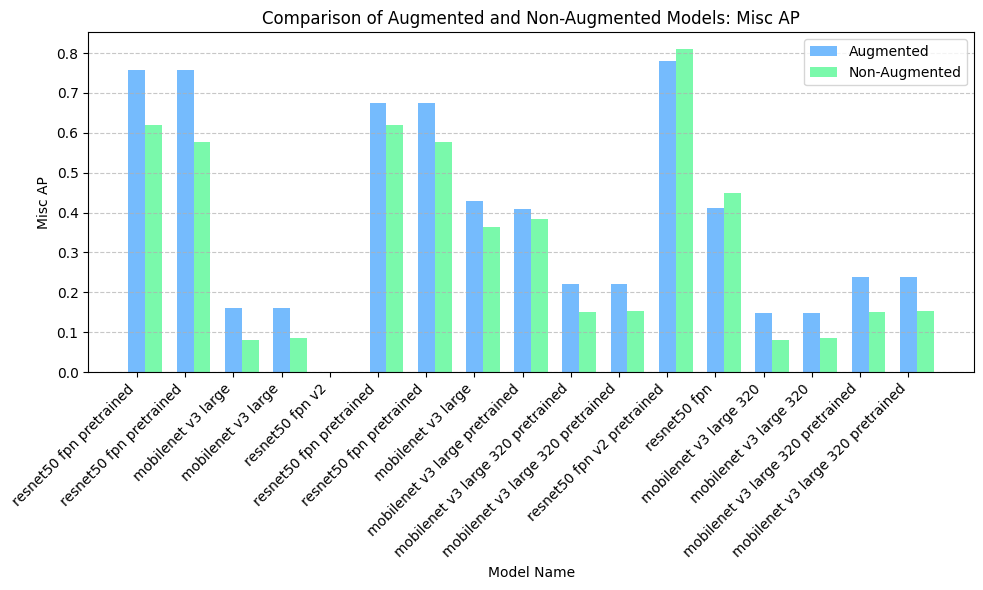

In [12]:
# Graph a bar chart where each pair is a group of two bars. The x axis will be the name of the model, and the y axis will be the test_precision. The two bars will be side by side, one for the augmented model and one for the non-augmented model. The title of the graph will be "Comparison of Augmented and Non-Augmented Models". The x axis label will be "Model Name" and the y axis label will be "Test Precision". The bars will be colored differently. The graph will be displayed.
"""
    "val_iou": 0.15061259269714355,
    "val_precision": 0.8777058185109722,
    "val_recall": 0.8472284689239467,
    "val_f1": 0.8617229889282549,
    "val_map": 0.7535181167185725,
    "test_iou": 0.1488405168056488,
    "test_precision": 0.8977682784428451,
    "test_recall": 0.8718351066783168,
    "test_f1": 0.8839659183253943,
    "test_map": 0.787337166822575,
    "Car_ap": 0.9618524469118936,
    "Van_ap": 0.9036627634481775,
    "Truck_ap": 0.8697219475156159,
    "Pedestrian_ap": 0.8104007468515242,
    "Person_sitting_ap": 0.35255985110292737,
    "Cyclist_ap": 0.8134884957482047,
    "Tram_ap": 0.6580914074873214,
    "Misc_ap": 0.6583672746829147
"""

all_keys = ['val_iou', 'val_precision', 'val_recall', 'val_f1', 'val_map', 'test_iou', 'test_precision', 'test_recall', 'test_f1', 'test_map', 'Car_ap', 'Van_ap', 'Truck_ap', 'Pedestrian_ap', 'Person_sitting_ap', 'Cyclist_ap', 'Tram_ap', 'Misc_ap']


for idx, key_y in enumerate(all_keys):
        plt.figure(figsize=(10, 6))
        bar_width = 0.35
        index = range(len(pairs))
        print([pair[0]["fname"] for pair in pairs])
        print(key_y)
        print([pair[0][key_y] for pair in pairs])
        print([pair[1][key_y] for pair in pairs])
        plt.bar(index, [pair[0][key_y] for pair in pairs], bar_width, label='Augmented', color='xkcd:sky blue')
        plt.bar([i + bar_width for i in index], [pair[1][key_y] for pair in pairs], bar_width, label='Non-Augmented', color='xkcd:seafoam green')
        plt.xlabel('Model Name')
        plt.ylabel(key_to_label[key_y])
        plt.title('Comparison of Augmented and Non-Augmented Models: ' + key_to_label[key_y])
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        # x axiz labels must be bigger
        plt.xticks(index, [file_to_name[pair[0]["fname"]] for pair in pairs], rotation=45, ha='right')
        plt.tight_layout()
        # download plot as image to folder called "graphs"
        plt.savefig(f'graphs/{key_y}-{len(pairs)}.png')

        print([pair[0]["fname"] for pair in pairs])
        plt.show()

In [19]:
# do the same as above but make them into plain text tables

# for idx, key_y in enumerate(all_keys):
#     print(key_to_label[key_y])
#     print("Model Name".ljust(50), "Augmented".ljust(20), "Non-Augmented".ljust(20))
#     for pair in pairs:
#         print(file_to_name[pair[0]["fname"]].ljust(50), str(pair[0][key_y]).ljust(20), str(pair[1][key_y]).ljust(20))
#     print("\n\n")
    
# make a data frame

df = []
# EDIT THIS LINE TO CREATE LATEX TABLE
key_y = 'test_precision'
for pair in pairs:
    df.append([file_to_name[pair[0]["fname"]], pair[0][key_y], pair[1][key_y]])

# print(tabulate(df, headers=["Model Name", "Augmented", "Non-Augmented"], tablefmt='grid'))


latex_table = tabulate(df, headers=[
    "Model Name",
    "Augmented",
    "Non-Augmented"

], tablefmt='latex', showindex=False)

# Add table environment and caption/label
title = 'Comparison of Augmented and Non-Augmented Models: ' + key_to_label[key_y]

latex_code = f"""
\\begin{{table}}[h!]
\\centering

{latex_table}
\\caption{{Benchmark results for various machine learning models: {title}}}
\\label{{tab:benchmark_results}}
\\end{{table}}
"""


print(latex_code)



\begin{table}[h!]
\centering

\begin{tabular}{lrr}
\hline
 0                                 &        1 &        2 \\
\hline
 resnet50 fpn pretrained           & 0.926405 & 0.918504 \\
 resnet50 fpn pretrained           & 0.926405 & 0.912437 \\
 mobilenet v3 large                & 0.584347 & 0.520202 \\
 mobilenet v3 large                & 0.584347 & 0.512376 \\
 resnet50 fpn v2                   & 0.252016 & 0.284247 \\
 resnet50 fpn pretrained           & 0.932679 & 0.918504 \\
 resnet50 fpn pretrained           & 0.932679 & 0.912437 \\
 mobilenet v3 large                & 0.818304 & 0.769519 \\
 mobilenet v3 large pretrained     & 0.837486 & 0.823919 \\
 mobilenet v3 large 320 pretrained & 0.674331 & 0.636671 \\
 mobilenet v3 large 320 pretrained & 0.674331 & 0.645748 \\
 resnet50 fpn v2 pretrained        & 0.94082  & 0.916447 \\
 resnet50 fpn                      & 0.859051 & 0.858789 \\
 mobilenet v3 large 320            & 0.596966 & 0.520202 \\
 mobilenet v3 large 320           